# Etude sur Les méthodes d'ensemble  "California Housing Dataset"
# 1 - la préparation des données

Trois Jupyter Notebooks organisés de la manière suivante :
    
- Le premier Notebook effectue la préparation des données c'est-à-dire qu'il charge l'intégralité du jeu de données (ici le California Housing Dataset), qu'il effectue le train_test_split(), etc

- Le deuxième Notebook charge le jeu d'apprentissage, entraine le modèle sur ces données en utilisant une technique de validation croisée et une recherche par grille pour l'optimisation des hyperparamètres. Il évalue et affiche enfin les performances du modèle entrainé sur le jeu d'apprentissage.

- Le troisième Notebook charge les données de test puis évalue sur ces données les performances du modèle entraîné dans le Notebook précédent. Il affiche enfin ces performances.

### 1 - import librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 2 - set option pour l'affichage

In [2]:
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("max_row", 500)

### 3 - Chargement des données du California Housing Dataset Boston

In [3]:
california = fetch_california_housing()

In [4]:
#print(california.data)
#print(california.target)

### 4 - Afficher la description des données en utilisant l'attribut DESCR

In [5]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

### 5 - affichage de DataFrame

In [6]:
df = pd.DataFrame(california.data, columns=california.feature_names)

Je crée une copie pour data + target

In [7]:
df_price = df.copy()
df_price[california.target_names[0]] = california.target
df_price.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Je vérifie info de DataFrame

In [8]:
df_price.info() # type = float64, pas de null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df_price.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

Je vérifie describe()

In [10]:
df_price.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 6 - echantilloage des données

In [11]:
X = california.data
y = california.target

In [12]:
type(X)

numpy.ndarray

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [15]:
df_train = pd.DataFrame(X_train, columns=california.feature_names)
df_train[california.target_names[0]] = y_train

In [16]:
df_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [17]:
df_test = pd.DataFrame(X_test, columns=california.feature_names)
df_test[california.target_names[0]] = y_test

In [18]:
df_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.00000,4128.00000,4128.000000
mean,3.830338,28.764293,5.404059,1.096637,1421.571705,2.965431,35.58671,-119.51936,2.055003
std,1.881515,12.518304,2.794717,0.610196,1114.023136,1.753316,2.13276,1.99447,1.144870
min,0.499900,1.000000,0.846154,0.500000,8.000000,1.263566,32.54000,-124.19000,0.149990
25%,2.548500,18.000000,4.396633,1.004338,781.000000,2.435365,33.93000,-121.69000,1.192750
50%,3.500000,29.000000,5.192764,1.046715,1160.000000,2.823586,34.23000,-118.47000,1.786500
75%,4.645925,37.000000,6.008889,1.095908,1722.000000,3.289374,37.70000,-117.99000,2.630000
max,15.000100,52.000000,132.533333,34.066667,16122.000000,83.171429,41.81000,-114.58000,5.000010


Je visualise les données train et test pour voir si la répartition est à peu près la même.

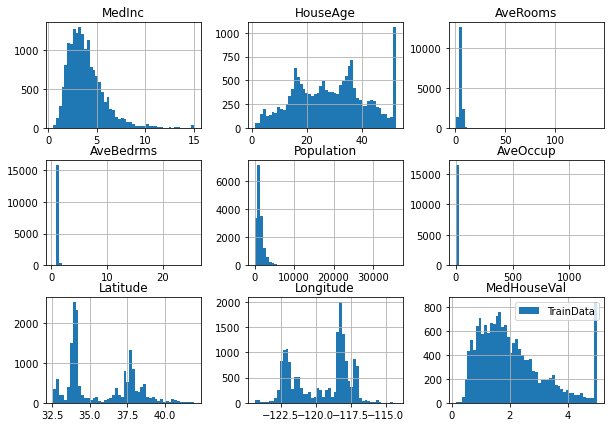

In [19]:
df_train.hist(bins=50, figsize=(10, 7), label='TrainData')
plt.legend()
plt.savefig('train_hist.png')
plt.show()

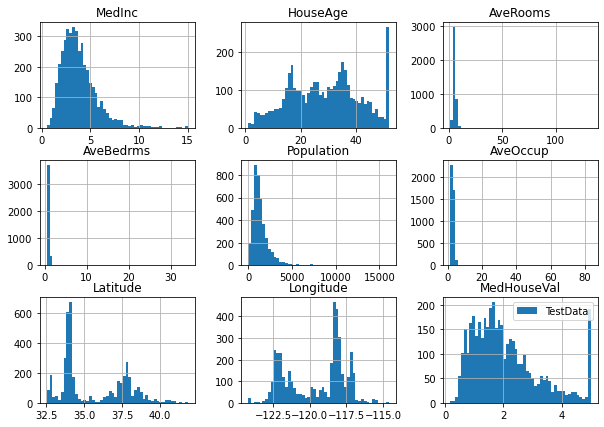

In [20]:
df_test.hist(bins=50, figsize=(10, 7), label='TestData')
plt.legend()
plt.savefig('test_hist.png')
plt.show()

Je constate que la répartition entre train et test est à peu près la même

### 7 - savegarder les donnée en csv pour les donnée sans nettoyage

In [21]:
# train data 
pd.DataFrame(X_train).to_csv("X_train.csv", header=df.columns, index = None)
pd.DataFrame(y_train).to_csv("y_train.csv", header=df_price.iloc[:, -1:].columns, index = None)
# test data
pd.DataFrame(X_test).to_csv("X_test.csv", header=df.columns, index = None)
pd.DataFrame(y_test).to_csv("y_test.csv", header=df_price.iloc[:, -1:].columns, index = None)

j'ai effecutué le nettoyage de données et standardisation ci-dessous, mais ce n'etait pas necessaires.

### 8 - nettoyage de données - Supprimer les valeurs aberrantes

In [22]:
# avant commencer à nettoyer des données de train, je copie le data set
df_train_cp = df_train.copy()

In [23]:
df_train_cp.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.03


In [24]:
# Arrondit la valeur d'un attribut donné au nombre entier le plus proche

ave_columns = ['AveRooms', 'AveBedrms', 'AveOccup']

for col in ave_columns:
  df_train_cp[col] = np.round(df_train_cp[col])

In [25]:
df_train_cp.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3.2596,33.0,5.0,1.0,2300.0,4.0,32.71,-117.03,1.03


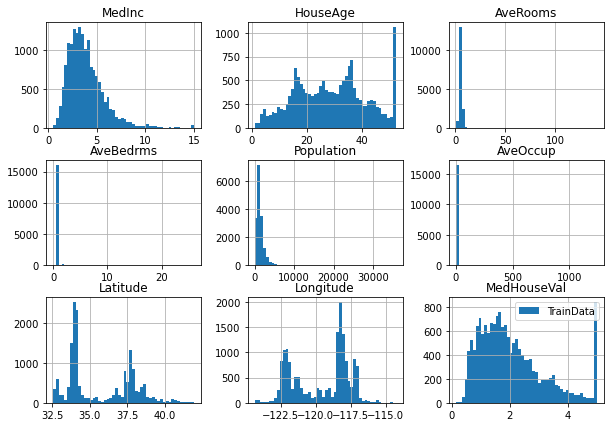

In [26]:
df_train_cp.hist(bins=50, figsize=(10, 7), label='TrainData')
plt.legend()
plt.savefig('train_hist.png')
plt.show()

Je constate que max HouseAge et max MedHouseVal(target) sont trop nombreuses. J'assume que ce sont des aberrants dans HouseAge et MedHouseVal(target).

In [27]:
df_train_cp = df_train_cp[df_train_cp['HouseAge'] < 52]
df_train_cp = df_train_cp[df_train_cp['MedHouseVal'] < 5]

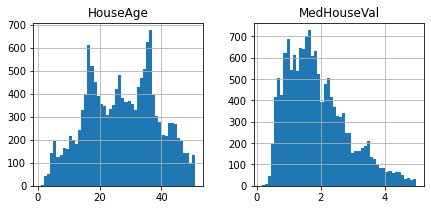

In [28]:
df_train_cp[['HouseAge', 'MedHouseVal']].hist(bins=50, figsize=(7, 3))
plt.savefig('house_price_del_hist.png')
plt.show()

In [29]:
# J'ai enlevé 1680 donnée dans le train comme aberrants.
# 16512 - 14832 = 1680
df_train_cp.shape, df_train.shape

((14832, 9), (16512, 9))

In [30]:
df_train_cp.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000,14832.000000
mean,3.698343,26.933657,5.387608,1.047600,1472.348840,3.141114,35.606286,-119.497554,1.893327
std,1.571901,11.436305,2.199120,0.408955,1168.621944,12.064158,2.149228,1.983274,0.953274
min,0.499900,1.000000,1.000000,0.000000,3.000000,1.000000,32.550000,-124.300000,0.149990
25%,2.536950,17.000000,4.000000,1.000000,813.750000,2.000000,33.920000,-121.580000,1.153000
50%,3.477300,27.000000,5.000000,1.000000,1206.000000,3.000000,34.250000,-118.460000,1.711000
75%,4.632450,36.000000,6.000000,1.000000,1783.000000,3.000000,37.680000,-117.970000,2.435250
max,15.000100,51.000000,62.000000,15.000000,35682.000000,1243.000000,41.950000,-114.310000,4.991000


### 9 - savegarder les donnée en csv

In [31]:
X_train_cleaned = df_train_cp.iloc[:,:-1]
y_train_cleaned = df_train_cp.iloc[:, -1:]

In [32]:
# train data sans aberrants, test data
X_train_cleaned.to_csv('X_train_cleaned.csv', index=False)
y_train_cleaned.to_csv('y_train_cleaned.csv', index=False)

In [33]:
"""# test data
pd.DataFrame(X_test).to_csv("X_test.csv", header=df.columns, index = None)
pd.DataFrame(y_test).to_csv("y_test.csv", header=df_price.iloc[:, -1:].columns, index = None)"""

'# test data\npd.DataFrame(X_test).to_csv("X_test.csv", header=df.columns, index = None)\npd.DataFrame(y_test).to_csv("y_test.csv", header=df_price.iloc[:, -1:].columns, index = None)'

### 10 - Standardisation avec scikit-learn

Random Forest n'est pas  besoin de feature scaling. Ce procedure est pour autres modéles.

In [34]:
X_std = df_train_cp.iloc[:,:-1]
y_std = df_train_cp.iloc[:, -1:]

In [35]:
scaler = StandardScaler()

In [36]:
df_train_std = scaler.fit_transform(df_train_cp)

In [37]:
X_std = scaler.fit_transform(X_std)

J'ai visualisé une exemple ('MedInc') de feature scaling 

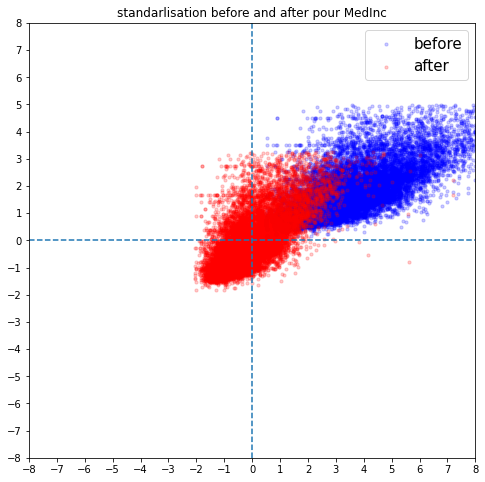

In [38]:
plt.figure(figsize = (8, 8))
  #タイトル
plt.title('standarlisation before and after pour MedInc')
  #x軸とy軸の範囲を設定
plt.xlim([-8, 8])
plt.ylim([-8, 8])
  #目盛の刻み
plt.xticks(np.arange(-8, 9, 1))
plt.yticks(np.arange(-8, 9, 1))
  #プロットの設定
plt.scatter(df_train_cp.iloc[:,:1], df_train_cp.iloc[:, -1:], c='blue', s=10, label='before', alpha=0.2)
plt.scatter(df_train_std[:,:1], df_train_std[:,-1:], c='red', s=10, label='after', alpha=0.2)
  #ラベルの設定
plt.legend(fontsize = 15)
  #中心ラインの設定
plt.hlines(0, xmin = -8, xmax = 8, linestyles = 'dashed')
plt.vlines(0, ymin = -8, ymax = 8, linestyles = 'dashed')
plt.show()

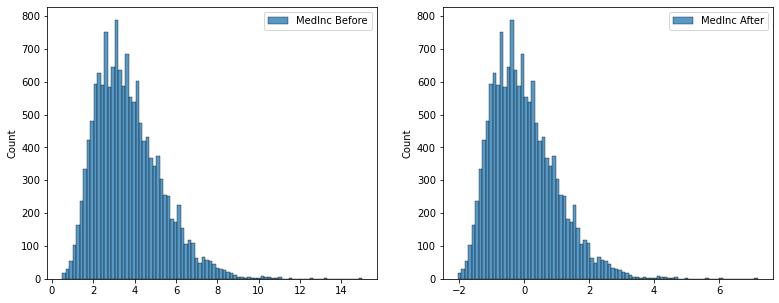

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

sns.histplot(df_train_cp.iloc[:,:1], kde=False, label='MedInc Before', ax=ax1)
sns.histplot(df_train_std[:,:1], kde=False, label='MedInc After', ax=ax2)
ax1.legend()
ax2.legend()
plt.show()

Je constate que la repartition de données ne sont pas changé avant et après le feature scaling(standarlisation).

je sauvegarde les données.

In [40]:
pd.DataFrame(df_train_std).to_csv("train_std.csv", header=df_price.columns, index = None)

In [41]:
"""# train data sans aberrants, test data
df_train_cp.to_csv('train_without_outlier.csv', index=False)
df_test.to_csv('test.csv', index=False)"""

"# train data sans aberrants, test data\ndf_train_cp.to_csv('train_without_outlier.csv', index=False)\ndf_test.to_csv('test.csv', index=False)"

In [42]:
df_train_std_1 = pd.read_csv('train_std.csv')

In [43]:
df_train_std_1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,-0.279126,0.530464,-0.176262,-0.116398,0.708252,0.071196,-1.347639,1.244224,-0.905674
1,0.072626,1.929564,-0.631004,-0.116398,-0.135505,-0.094590,-0.854422,0.674440,2.022229
2,0.291349,-2.005406,0.278481,-0.116398,-0.476944,-0.011697,-0.440306,-0.495382,-0.175534
3,-1.117056,0.792795,-0.631004,-0.116398,-0.046508,0.071196,-1.356945,1.203885,-1.006383
4,-0.091703,1.404902,0.278481,-0.116398,-0.512030,-0.094590,0.546128,-0.152503,-0.973863
...,...,...,...,...,...,...,...,...,...
14827,0.046097,0.617908,-0.176262,-0.116398,-0.112400,0.071196,-0.724138,0.785371,-0.270998
14828,1.699691,0.705352,0.278481,-0.116398,-0.696869,-0.011697,-0.849769,0.775287,0.418229
14829,-0.412472,0.530464,0.733223,-0.116398,0.240164,0.071196,-0.738097,1.042530,-0.960225
14830,-0.486016,0.792795,-0.631004,-0.116398,0.242731,-0.011697,-0.733444,0.563508,0.343746
